In [11]:
# The gaol of the analysis is to create visualizations to understand any current underlying patterns
# in goals that I have set for myself.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# Formatting for charts, used as shorthand notation

labelFormatOut = {'size': 20, 'weight': 'bold', 'labelpad': 20, 'fontname': 'serif'}
labelFormat = {'size': 20, 'weight': 'bold', 'fontname': 'serif'}
titleFormat = {'size': 30, 'weight': 'bold', 'y': 1.03, 'fontname': 'serif'}

In [12]:
# Reads the CSV file and cleans the data. In this example, we will:
# - Map all true/false values to either 1 or 0 respectively.
# - Relabel all of the columns.
# - Remove blank rows.

df = pd.read_csv('_goals_csv_rendition_0.csv')
df.dropna(0, inplace=True)
df.drop(labels=['W/out.1', 'Reading', 'Working', 'Coding', 'Bedtime', 'Journal.1', 'Drawing'], axis=1, inplace=True)
tfdict = {True:1, False:0}
df.columns = ['DAY', 'WOUT', 'INIT', 'DUO1', 'DUO2', 'DANCE', 'READ', 'PORTF', 'JOURN', 'BED']
for item in df.columns:
    if item == 'DAY':
        continue
    df[item] = df[item].map(tfdict)
df.head()

,DAY,WOUT,INIT,DUO1,DUO2,DANCE,READ,PORTF,JOURN,BED
0,4/20/2023,1,0,1,0,0,0,0,0,0
1,4/21/2023,1,0,0,0,0,0,0,0,0
2,4/22/2023,0,0,0,0,0,0,0,0,0
3,4/23/2023,1,0,1,0,0,0,0,0,0
4,4/24/2023,0,1,0,0,0,0,0,0,0


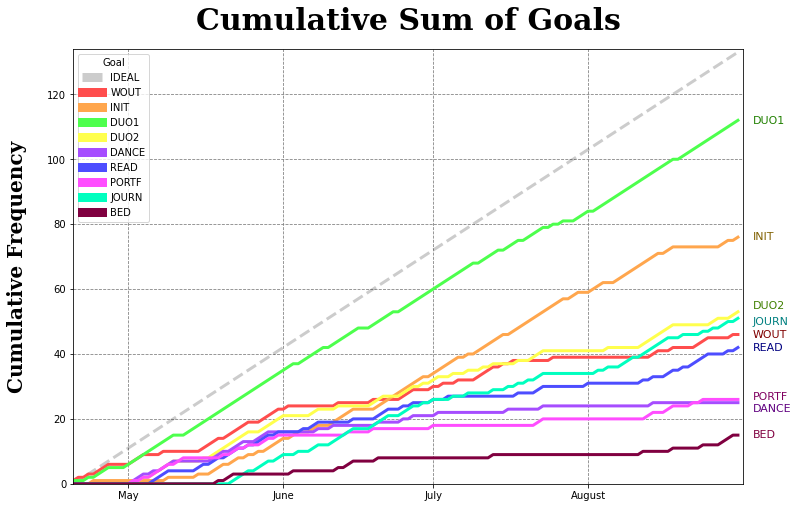

In [13]:
# Plots the cumulative sum of goals done.

color_scale = [ # Color list for the various lines on the "Cumulative Sum of Goals" (CSG) chart.
    "#ff4d4d", # WOUT
    "#ffa64d", # INIT
    "#4dff4d", # DUO1
    "#ffff4d", # DUO2
    "#a64dff", # DANCE
    "#4d4dff", # READ
    "#ff4dff", # PORTF
    '#00ffbf', # JOURN
    '#800040'  # BED
]

color_scale_f = [ # Color list for the various labels on the right-hand side of the (CSG) chart.
    "#800000", # WOUT
    "#806000", # INIT
    "#208000", # DUO1
    "#408000", # DUO2
    "#600080", # DANCE
    "#000080", # READ
    "#800060", # PORTF
    '#008080', # JOURN
    '#800040'  # BED
]

yPos = [ # Y-positions for the various labels on the right-hand side of the (CSG) chart.
    46,  # WOUT
    76,  # INIT
    112, # DUO1
    55,  # DUO2
    23,  # DANCE
    42,  # READ
    27,  # PORTF
    50,  # JOURN
    15   # BED
]

# Creates the template for the chart, as well as an "IDEAL", or perfect scenario line.

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(df.index, df.index, c='black', linewidth=3, linestyle='dashed', alpha=0.2)
ax.set_xlim(0, len(df))
ax.set_ylim(0, len(df))
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')

# Iterates through the Goals (tasks) and plots them with their corresponding label

iteration = 0
for item in df.columns:
    if item == 'DAY':
        continue
    plt.plot(df['DAY'], df[item].cumsum(), color=color_scale[iteration], linewidth=3)
    ax.text(136, yPos[iteration], item, color=color_scale_f[iteration], fontsize=11, va='center')
    iteration += 1

# Chart formatting parameters (title, labels, margins, and x-values).
    
plt.title('Cumulative Sum of Goals', **titleFormat)
plt.ylabel('Cumulative Frequency', **labelFormatOut)
plt.xticks(ticks=[11,42,72,103], labels=['May', 'June', 'July', 'August'])
plt.margins(x=0)

# Creates the chart legend. In this case, we just make the legend visible and neat.

cumul_leg = plt.legend(df.columns[1:].insert(0, 'IDEAL'), title='Goal')
for obj in cumul_leg.legendHandles:
    obj.set_linewidth(9.0)
plt.show()

In [14]:
# Since many of the goals were not started until around 5/20/2023, we will remove the outlying data.
# This will allow for more relevant information to show up in terms of our data.

df_rel = df[df['DAY'].str.contains("[^4]\/\d+\/2+", regex=True)].reset_index()
df_rel.drop(labels=['index'], axis=1, inplace=True)
for i in range(19):
    df_rel.drop(i, inplace=True)
df_rel.reset_index(inplace=True)
df_rel.drop(labels=['index'], axis=1, inplace=True)
df_rel.head()

,DAY,WOUT,INIT,DUO1,DUO2,DANCE,READ,PORTF,JOURN,BED
0,5/20/2023,0,1,1,1,1,0,1,0,0
1,5/21/2023,1,0,1,1,0,1,0,0,1
2,5/22/2023,1,1,1,1,1,1,1,1,1
3,5/23/2023,1,1,1,1,1,1,1,1,0
4,5/24/2023,1,0,1,1,1,0,0,1,0


In [15]:
# Checks for a correlation of 1. If not, customizes the color mapping.

def color_map(val):
    color = '#cdcdcd' if val >= 1.0 else createShade(val)
    return 'background-color: %s' % color

# Creates a scaling factor that allows scaling in base 10 (used to converts correlations below).

def mapped_scaling(value, orig_min, orig_max, new_min, new_max):
    orig_range = orig_max - orig_min
    new_range = new_max - new_min
    scaling_f = new_range / orig_range
    
    mapped_value = (value - orig_min) * scaling_f + new_min
    return int(mapped_value)

# Creates a shading mapping based on the correlation value. 
# Yellow - Positive correlation
# Pink   - Negative correlation
# Note: Transparency in values indicates that there is less correlation.

def createShade(value):
    if value > 0:
        return '#FFFF{}'.format(hex(mapped_scaling(value,0,1,255,0))[2:])
    else:
        return '#FF{}FF'.format(hex(mapped_scaling(value,-1,0,0,255))[2:])

# Creates the correlation and applies the color mapping.

corr_df = df_rel.corr()
corr_df = corr_df.style.applymap(color_map)
corr_df

,WOUT,INIT,DUO1,DUO2,DANCE,READ,PORTF,JOURN,BED
WOUT,1.000000,0.051648,0.140859,0.328678,0.177667,0.201564,0.300761,0.054497,0.164336
INIT,0.051648,1.000000,0.033756,0.194833,0.118923,0.078766,0.093465,0.296832,0.087301
DUO1,0.140859,0.033756,1.000000,0.331140,0.168175,0.274874,0.180439,0.330538,0.155556
DUO2,0.328678,0.194833,0.331140,1.000000,0.345516,0.330592,0.390066,0.504375,0.126515
DANCE,0.177667,0.118923,0.168175,0.345516,1.000000,0.327764,0.298034,0.328062,-0.012012
READ,0.201564,0.078766,0.274874,0.330592,0.327764,1.000000,0.439712,0.382437,0.205578
PORTF,0.300761,0.093465,0.180439,0.390066,0.298034,0.439712,1.000000,0.313853,0.117428
JOURN,0.054497,0.296832,0.330538,0.504375,0.328062,0.382437,0.313853,1.000000,0.176648
BED,0.164336,0.087301,0.155556,0.126515,-0.012012,0.205578,0.117428,0.176648,1.000000


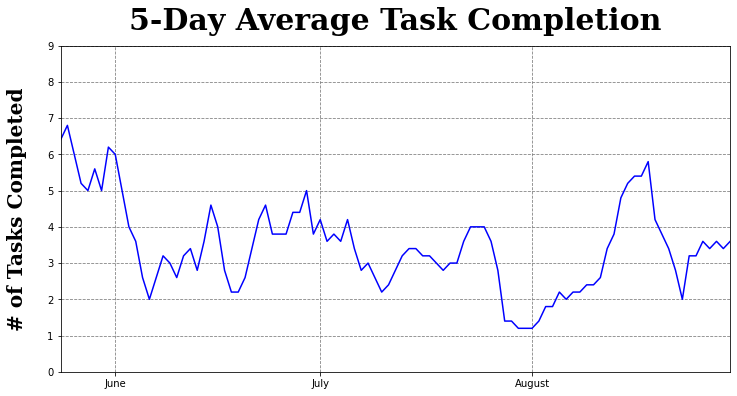

In [16]:
# Plots the 5-Day Average Task Completion frequency. The following creates a new column 'TOTAL', representing the 
# sum of tasks done for the day. This is then averaged based on the past five days of this date.

# The data time dates for this measurement are taken from 5/20/23 - 8/31/23.

df_c_trend = df_rel.copy()
df_c_trend['TOTAL'] = df_c_trend.sum(axis=1)

y_vals = []
for item in range(4, len(df_c_trend)-1):
    y_vals.append(sum(df_c_trend.iloc[item-4:item+1]['TOTAL']))

# Plots the function.

plt.figure(figsize=(12,6))
plt.title('5-Day Average Task Completion', **titleFormat)
plt.ylabel('# of Tasks Completed', **labelFormatOut)
plt.plot(range(4, len(df_c_trend)-1), y_vals, c='b')
plt.xticks(ticks=[12, 42, 73], labels=['June', 'July', 'August'])
plt.yticks(ticks=range(0, 46, 5), labels=range(10))
plt.margins(x=0)

# Formats the dashed gridlines in the background.

ax = plt.subplot()
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')

# Shows the chart.

plt.show()

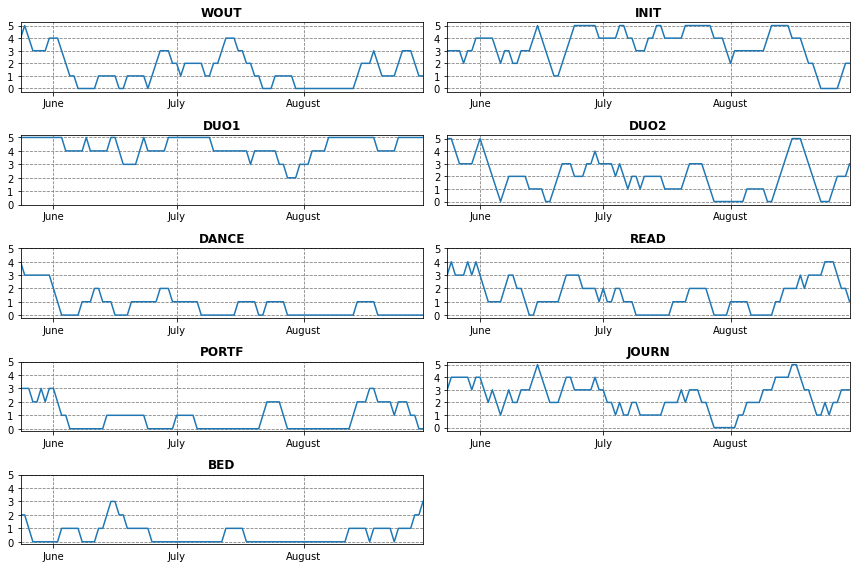

In [17]:
# Plots the 5-Day Task Completion Frequency for individual tasks. This is measured through looking at the
# past 5 days, and then plotting the frequency of the task being done.

df_trend = df_rel.copy()
plt.figure(figsize=(12,8))
splot = 521

# Iterates through each column to perform calculations. This data is taken from dates 5/20/23 - 8/31/23.

for task in df_trend.columns:
    if task == 'DAY':
        continue
    y_vals = []
    for item in range (4, len(df_trend)-1):
        y_vals.append(sum(df_trend.iloc[item-4:item+1][task]))
    
    # Plots the individual graph for the current task
    
    plt.subplot(splot)
    plt.plot(range(4, len(df_trend)-1), y_vals)
    plt.title(task, fontweight='bold')
    plt.xticks(ticks=[12, 42, 73], labels=['June', 'July', 'August'])
    plt.yticks(ticks=range(6), labels=range(6))
    plt.margins(x=0)
    
    # Formats the dashed gridlines in the background, and then updates the subplot (splot) location.

    ax = plt.subplot(splot)
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    splot += 1
    
plt.tight_layout()
plt.show()